In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load and preprocess the dataset
The MADBase is modified Arabic handwritten digits database contains 60,000 training images, and 10,000 test images. MADBase were written by 700 writers. Each writer wrote each digit (from 0 -9) ten times. Date source: https://www.kaggle.com/mloey1/ahdd1

In [ ]:
x_train=pd.read_csv("/content/gdrive/MyDrive/csvTrainImages 60k x 784.csv").values.reshape(-1,28,28)
y_train=pd.read_csv("/content/gdrive/MyDrive/csvTrainLabel 60k x 1.csv").values.reshape(-1)
x_test=pd.read_csv("/content/gdrive/MyDrive/csvTestImages 10k x 784.csv").values.reshape(-1,28,28)
y_test=pd.read_csv("/content/gdrive/MyDrive/csvTestLabel 10k x 1.csv").values.reshape(-1)

In [ ]:
# Use smaller subset -- speeds things up
x_train = x_train[:20000]
y_train = y_train[:20000]
x_test = x_test[:2000]
y_test = y_test[:2000]

In [ ]:
print("train X shape: ", x_train.shape) 
print("train y shape: ", y_train.shape)  
print("test X shape: ", x_test.shape)  
print("test y shape: ", y_test.shape) 

train X shape:  (20000, 28, 28)
train y shape:  (20000,)
test X shape:  (2000, 28, 28)
test y shape:  (2000,)


In [ ]:
print("minimum train y value: ", min(y_train))
print("maximum train y value: ", max(y_train))

minimum train y value:  0
maximum train y value:  9


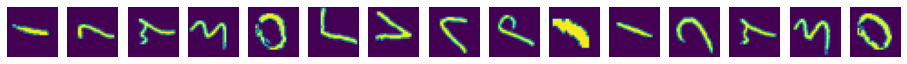

In [ ]:
fig, ax = plt.subplots(1, 15, figsize=(16, 1))
for i in range(15):
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i])

# Build Neural Network Models

In [ ]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test[..., np.newaxis], y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

In [ ]:
def plot(history):
  frame = pd.DataFrame(history.history)
  epochs = np.arange(len(frame))
  fig = plt.figure(figsize=(12,4))

  # Loss plot
  ax = fig.add_subplot(121)
  ax.plot(epochs, frame['loss'], label="Train")
  ax.plot(epochs, frame['val_loss'], label="Validation")
  ax.set_xlabel("Epochs")
  ax.set_ylabel("Loss")
  ax.set_title("Loss vs Epochs")
  ax.legend()

  # Accuracy plot
  ax = fig.add_subplot(122)
  ax.plot(epochs, frame['sparse_categorical_accuracy'], label="Train")
  ax.plot(epochs, frame['val_sparse_categorical_accuracy'], label="Validation")
  ax.set_xlabel("Epochs")
  ax.set_ylabel("Mean Absolute Error")
  ax.set_title("Mean Absolute Error vs Epochs")
  ax.legend()

In [ ]:
# The initial model
model = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)),
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                589888    
_________________________________________________________________
dense_49 (Dense)             (None, 10)                650       
Total params: 590,698
Trainable params: 590,698
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

In [ ]:
# Test accuracy of the untrained model
get_test_accuracy(model, x_test, y_test)

accuracy: 0.034


In [ ]:
checkpoint_path = 'model_checkpoints/checkpoint'
checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                             save_freq='epoch',
                             save_weights_only=True,
                             verbose=1)

In [ ]:
history =model.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.2, callbacks=[checkpoint], 
                   verbose = 1)

Epoch 1/15
250/250 [==============================] - 11s 42ms/step - loss: 2.4843 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.4089 - val_sparse_categorical_accuracy: 0.9385

Epoch 00001: saving model to model_checkpoints/checkpoint
Epoch 2/15
250/250 [==============================] - 10s 42ms/step - loss: 0.2480 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.2637 - val_sparse_categorical_accuracy: 0.9572

Epoch 00002: saving model to model_checkpoints/checkpoint
Epoch 3/15
250/250 [==============================] - 10s 42ms/step - loss: 0.1490 - sparse_categorical_accuracy: 0.9719 - val_loss: 0.1892 - val_sparse_categorical_accuracy: 0.9693

Epoch 00003: saving model to model_checkpoints/checkpoint
Epoch 4/15
250/250 [==============================] - 10s 42ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9774 - val_loss: 0.1834 - val_sparse_categorical_accuracy: 0.9732

Epoch 00004: saving model to model_checkpoints/checkpoint
Epoch 5/15
250/250 [================

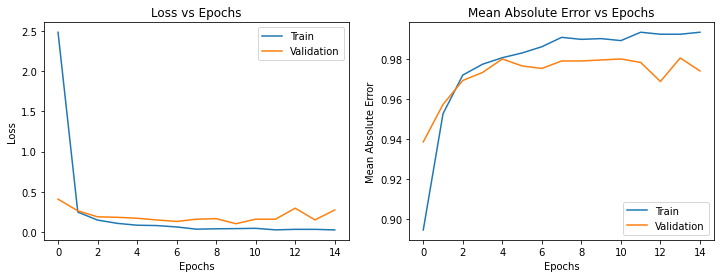

In [ ]:
plot(history)

In [ ]:
get_test_accuracy(model, x_test, y_test)

accuracy: 0.965


## Bigger Models

### Model 1

In [ ]:
model1 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), # note we need 1 in  input_shape=(28,28,1)
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(10, activation='softmax')
])
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                589888    
_________________________________________________________________
dense_51 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                330       
Total params: 592,458
Trainable params: 592,458
Non-trainable params: 0
_______________________________________________

In [ ]:
model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model1.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

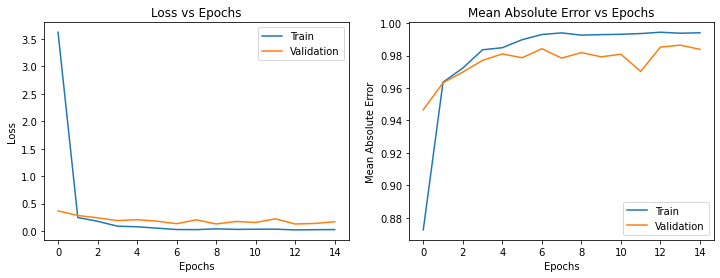

In [ ]:
plot(history)

In [ ]:
get_test_accuracy(model1, x_test, y_test)

accuracy: 0.967


### Model 2

In [ ]:
model2 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), # note we need 1 in  input_shape=(28,28,1)
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(128, activation = 'relu'),
                    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 64)                589888    
_________________________________________________________________
dense_54 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1290      
Total params: 599,658
Trainable params: 599,658
Non-trainable params: 0
_______________________________________________

In [ ]:
model2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model2.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

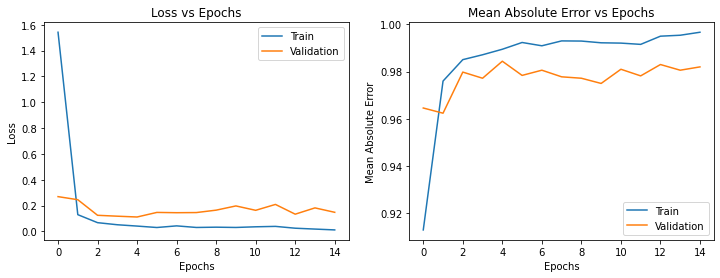

In [ ]:
plot(history)

In [ ]:
get_test_accuracy(model2, x_test, y_test)

accuracy: 0.976


### Model 3

In [ ]:
model3 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'), 
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation='softmax')
])
model3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
flatten_18 (Flatten)         (None, 7744)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_57 (Dense)             (None, 10)                650       
Total params: 498,810
Trainable params: 498,810
Non-trainable params: 0
_______________________________________________

accuracy: 0.976


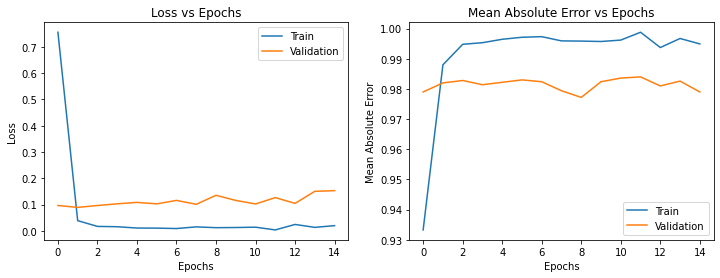

In [ ]:
model3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model3.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model3, x_test, y_test)

### Model 4

accuracy: 0.975


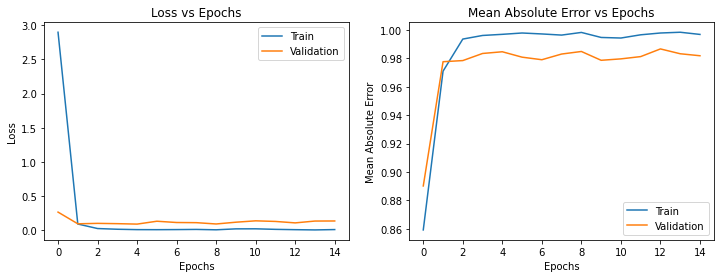

In [ ]:
model4 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=20, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu'), 
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model4.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model4.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model4, x_test, y_test)

### Model 5

accuracy: 0.967


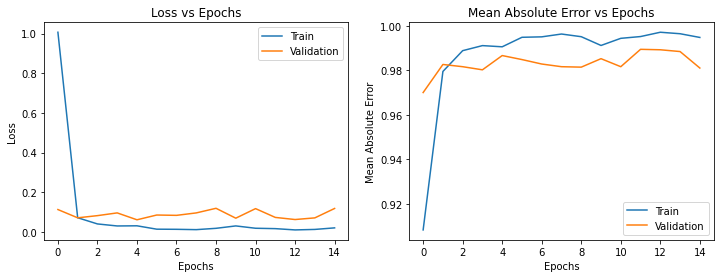

In [ ]:
model5 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model5.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model5.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model5, x_test, y_test)

### Model 6

accuracy: 0.973


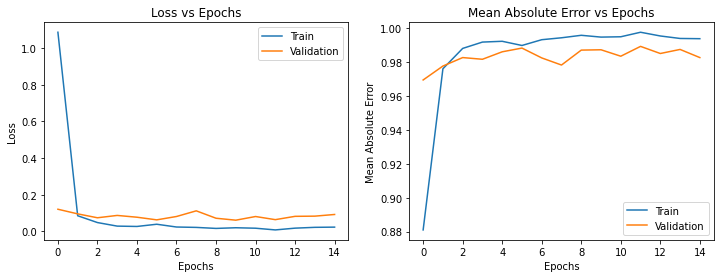

In [ ]:
model6 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model6.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model6.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model6, x_test, y_test)

### Model 7

accuracy: 0.979


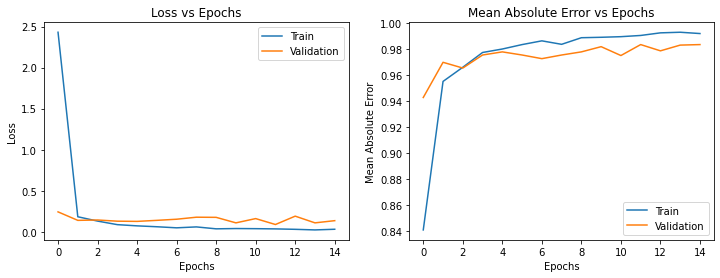

In [ ]:
model7 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model7.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model7.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model7, x_test, y_test)

### Model 8

accuracy: 0.961


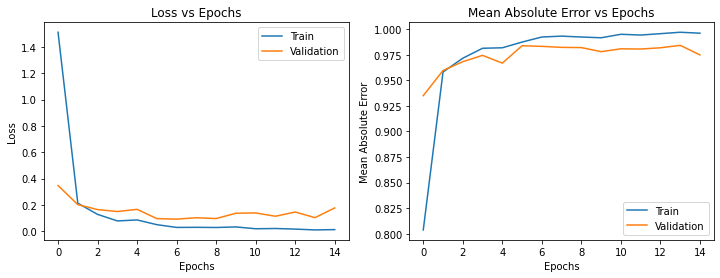

In [ ]:
model8 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model8.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model8.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model8, x_test, y_test)

### Model 9

accuracy: 0.976


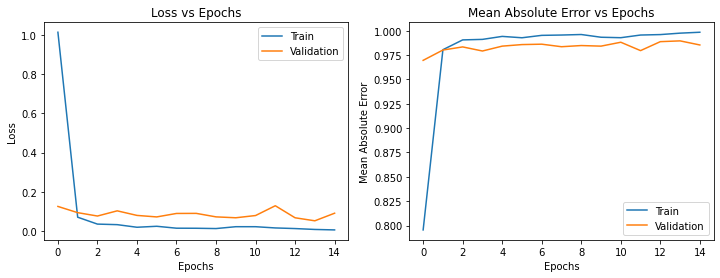

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model9.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

### Model 10

accuracy: 0.968


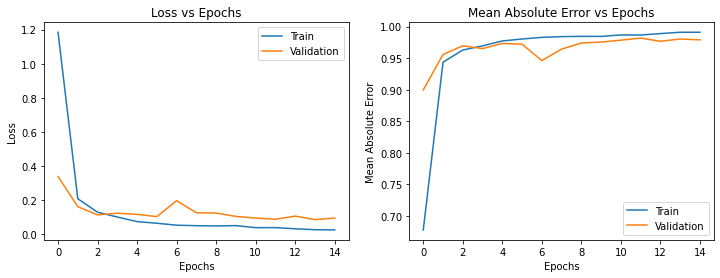

In [ ]:
model10 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Conv2D(filters=6, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model10.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model10.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model10, x_test, y_test)

## Play with Optimization Algorithm

### SGD, with learning rate 0.005

accuracy: 0.969


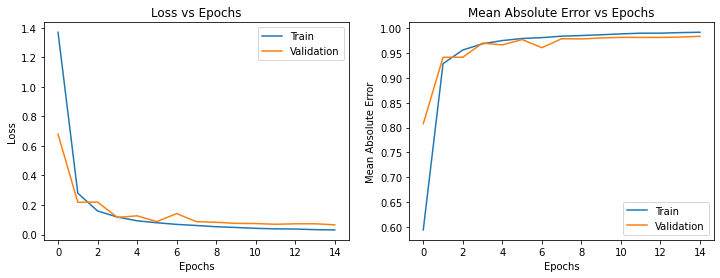

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

### Nadam, with learning rate 0.005

accuracy: 0.981


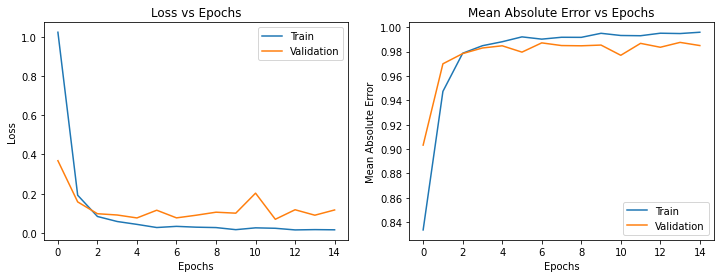

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

### Adagrad

accuracy: 0.956


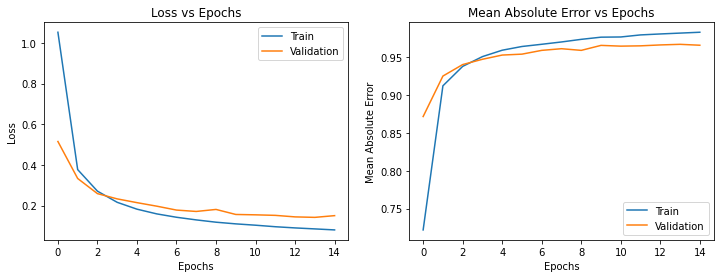

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=15, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

## Play with number of epochs

### epochs=20

Epoch 1/20
250/250 [==============================] - 24s 96ms/step - loss: 0.7240 - sparse_categorical_accuracy: 0.8021 - val_loss: 0.1427 - val_sparse_categorical_accuracy: 0.9632
Epoch 2/20
250/250 [==============================] - 24s 95ms/step - loss: 0.1027 - sparse_categorical_accuracy: 0.9743 - val_loss: 0.1261 - val_sparse_categorical_accuracy: 0.9710
Epoch 3/20
250/250 [==============================] - 24s 96ms/step - loss: 0.0541 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0915 - val_sparse_categorical_accuracy: 0.9810
Epoch 4/20
250/250 [==============================] - 24s 95ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9872 - val_loss: 0.0929 - val_sparse_categorical_accuracy: 0.9812
Epoch 5/20
250/250 [==============================] - 24s 95ms/step - loss: 0.0391 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.0893 - val_sparse_categorical_accuracy: 0.9820
Epoch 6/20
250/250 [==============================] - 24s 95ms/step - loss: 0.0289 - spars

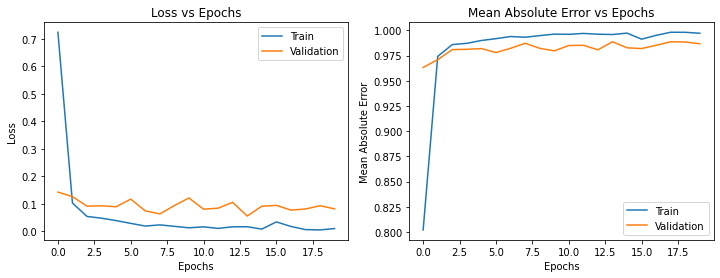

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = 1)

plot(history)
get_test_accuracy(model9, x_test, y_test)

### epochs=25

accuracy: 0.980


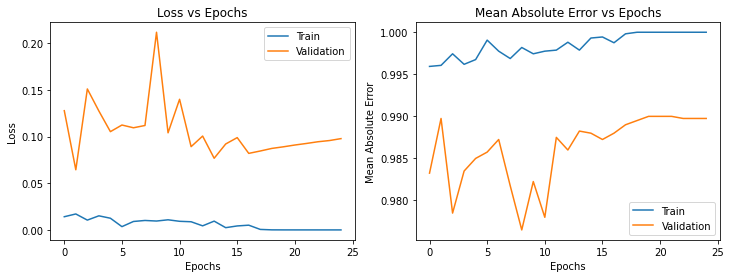

In [ ]:
model9.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=25, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

### epochs=30

accuracy: 0.984


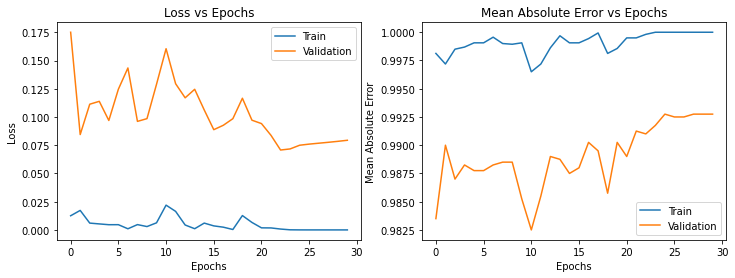

In [ ]:
model9.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=30, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

## Play with weight initialization



### HeUniform

accuracy: 0.979


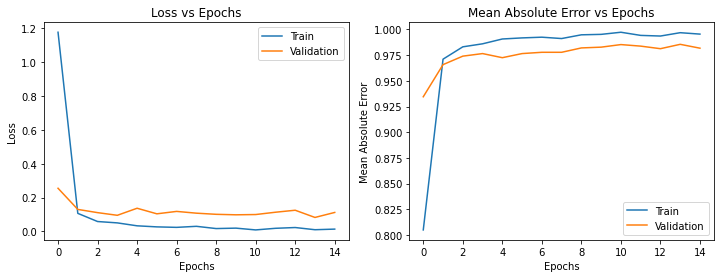

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

### LecunUniform

accuracy: 0.977


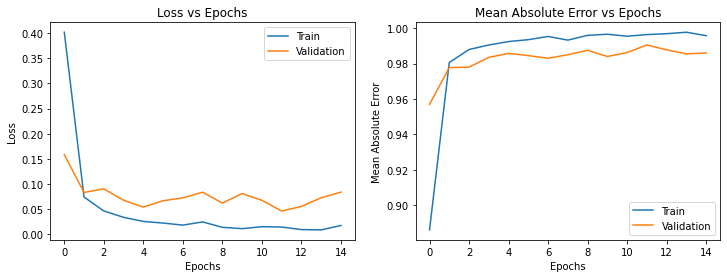

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='lecun_uniform'),
                    Dense(32, activation = 'relu', kernel_initializer='lecun_uniform'),
                    Dense(16, activation = 'relu', kernel_initializer='lecun_uniform'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

### RandomUniform

accuracy: 0.978


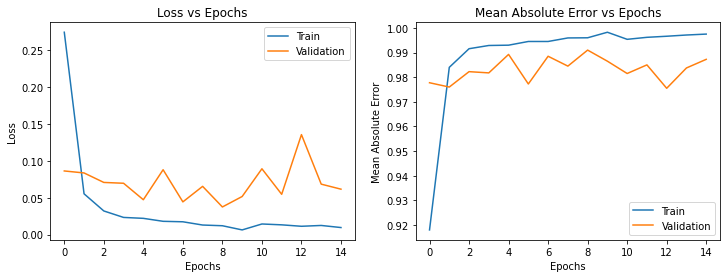

In [ ]:
model9 = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='random_uniform'),
                    Dense(32, activation = 'relu', kernel_initializer='random_uniform'),
                    Dense(16, activation = 'relu', kernel_initializer='random_uniform'),
                    Dense(10, activation='softmax')
])

model9.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model9.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model9, x_test, y_test)

# Best Model

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 20, 20, 16)        6416      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 64)                102464    
_________________________________________________________________
dense_105 (Dense)            (None, 32)              

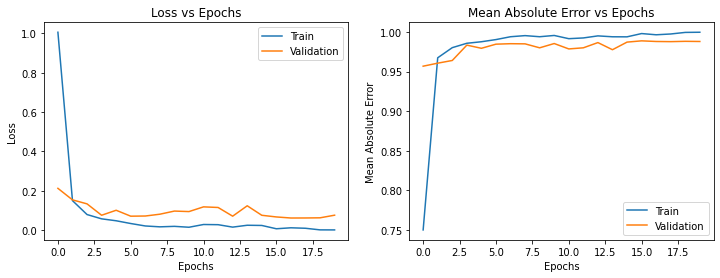

In [40]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', 
                           activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu',  kernel_initializer='he_uniform'),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dense(10, activation='softmax')
])

model_best.summary()

model_best.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

# Validation

## L2 Regulation

### Use a penalty rate of 0.001

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 16)        6416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

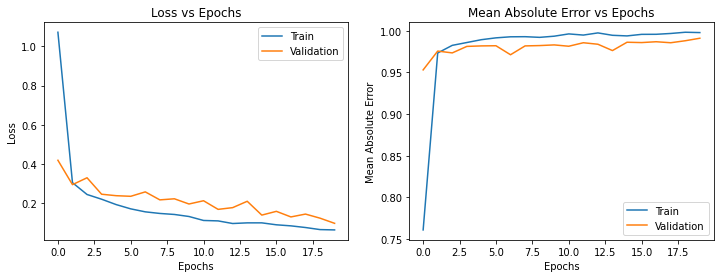

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dense(10, activation='softmax')
])
model_best.summary()

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Use a penalty rate of 0.01

accuracy: 0.982


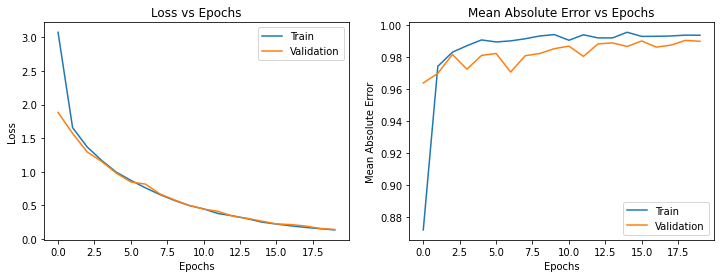

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Use a penalty rate of 0.1

accuracy: 0.980


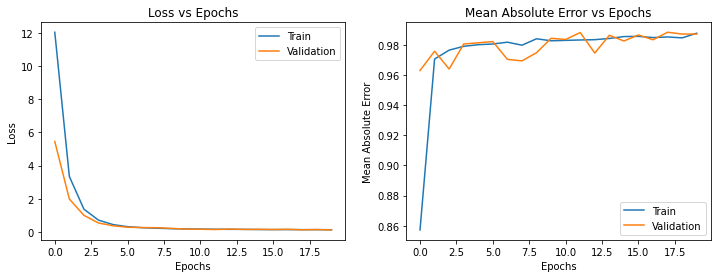

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Use a penalty rate of 0.0001

accuracy: 0.979


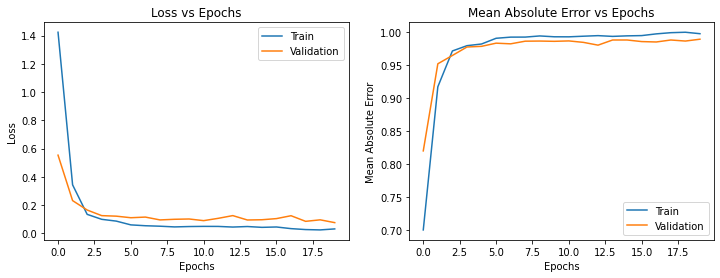

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Use a penalty rate of 0.2

accuracy: 0.979


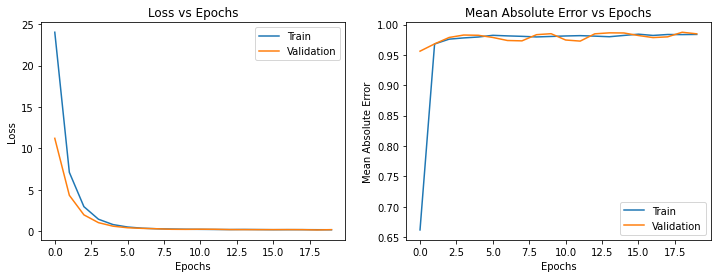

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.2)),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

## Dropout

### dropout rate = 0.1



accuracy: 0.979


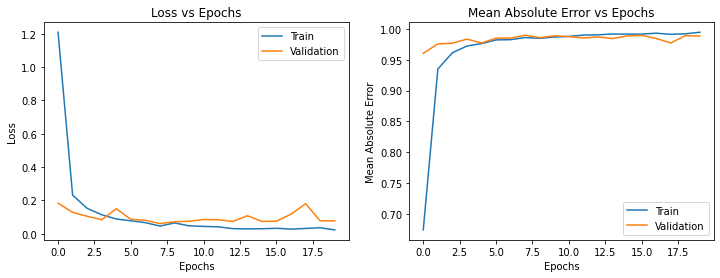

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout rate = 0.2

accuracy: 0.979


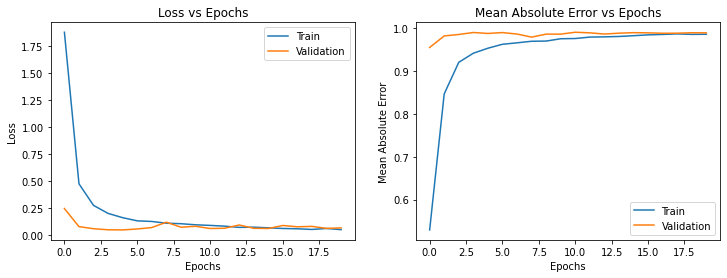

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout rate = 0.3

accuracy: 0.979


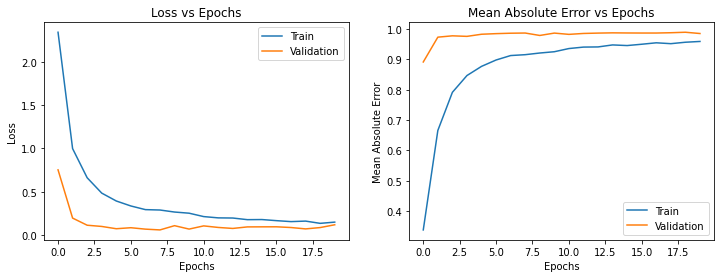

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.3),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.3),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.3),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout rate = 0.4

accuracy: 0.684


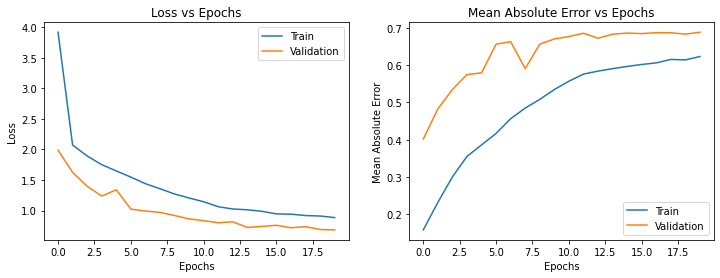

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.4),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.4),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.4),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout rate = 0.5

accuracy: 0.100


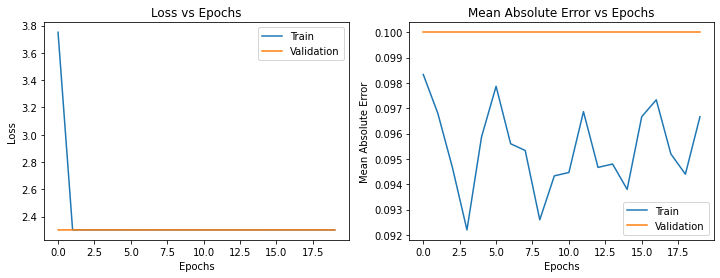

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.5),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.5),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.5),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

## Misture of dropout and L2 regulation

### Dropout = 0.1, penalty rate = 0.01

accuracy: 0.984


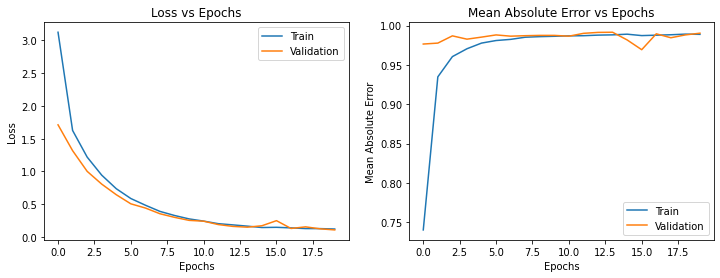

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.1),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.1),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.1),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Dropout = 0.2, penalty rate = 0.01

accuracy: 0.984


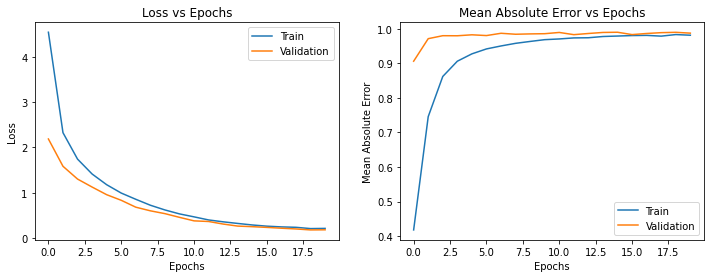

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), 
                           padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform',
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.2),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.2),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Dropout = 0.1, penalty rate = 0.001

accuracy: 0.979


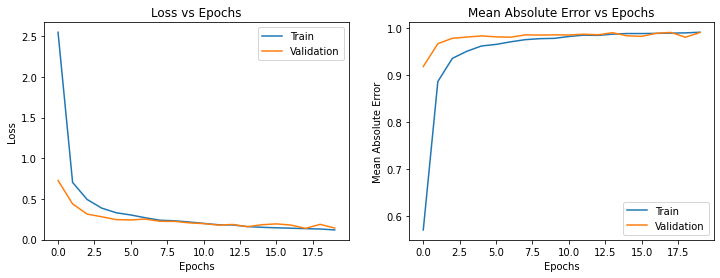

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', 
                           activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.1),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.1),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.1),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Dropout = 0.2, penalty rate = 0.001

accuracy: 0.983


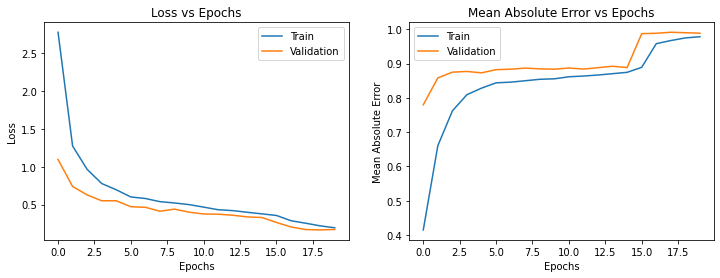

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', 
                           activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', 
                          kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### Dropout = 0.2, penalty rate = 0.1

accuracy: 0.979


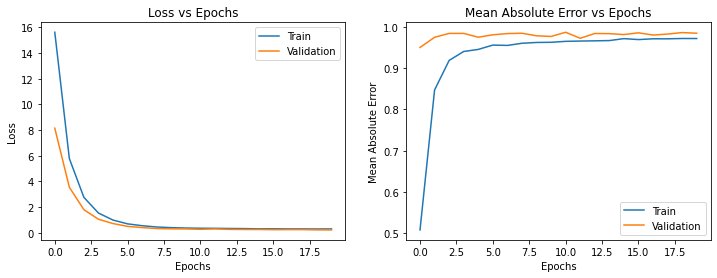

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                    Dropout(0.2),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                    Dropout(0.2),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
                    Dropout(0.2),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

## Batch-normalization

### Default

accuracy: 0.979


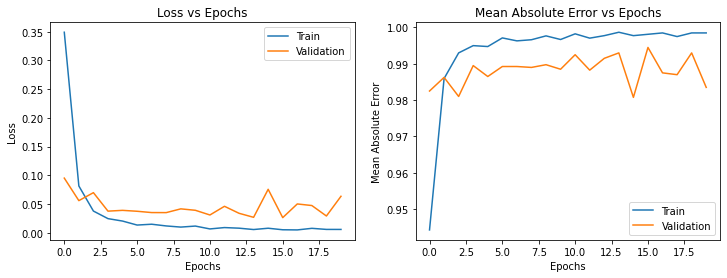

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### epsilon=0.01

accuracy: 0.983


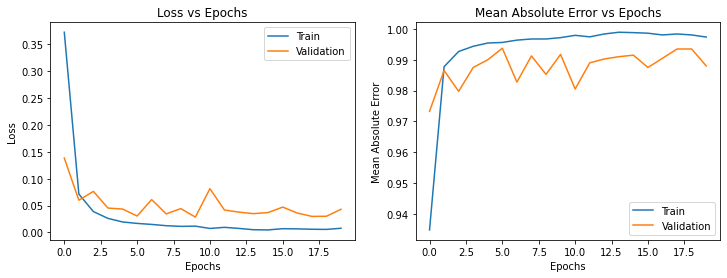

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(epsilon=0.01),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(epsilon=0.01),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(epsilon=0.01),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### momentum=0.5

accuracy: 0.985


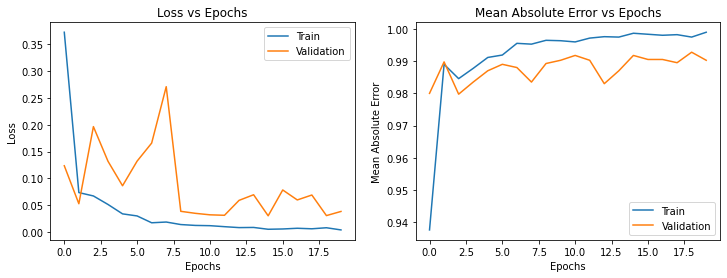

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(momentum=0.5),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(momentum=0.5),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(momentum=0.5),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### center=False

accuracy: 0.984


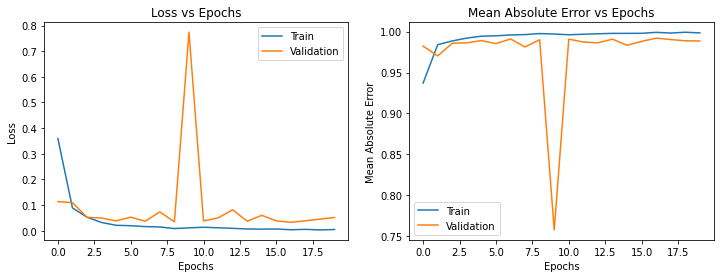

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(center=False),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(center=False),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(center=False),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### scale=False

accuracy: 0.980


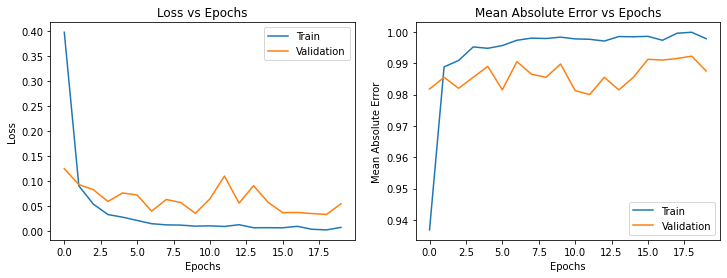

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(scale=False),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(scale=False),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    BatchNormalization(scale=False),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

## Misture of Batch-normalization and dropout

### dropout=0.1 , default batch-normalization

accuracy: 0.983


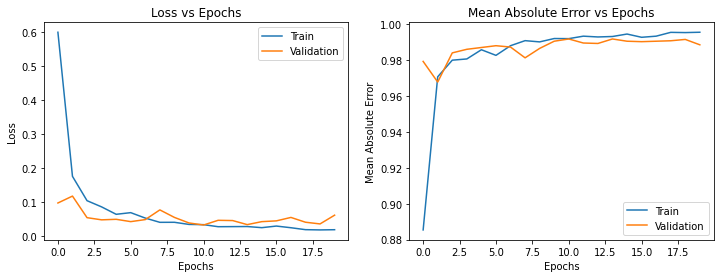

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.2 , default batch-normalization

accuracy: 0.987


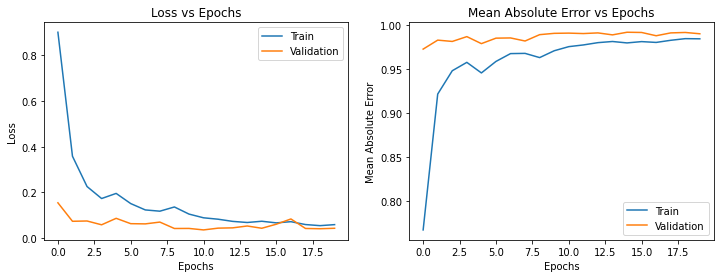

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.2 , batch-normalization epsilon=0.01

accuracy: 0.984


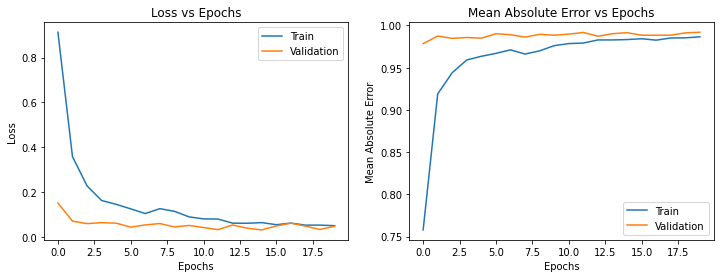

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    BatchNormalization(epsilon=0.01),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    BatchNormalization(epsilon=0.01),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.2),
                    BatchNormalization(epsilon=0.01),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.2 , batch-normalization momentum=0.5

accuracy: 0.984


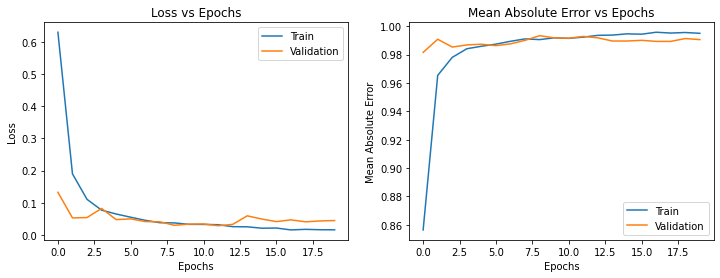

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(momentum=0.5),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(momentum=0.5),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(momentum=0.5),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.3, default batch-normalization

accuracy: 0.983


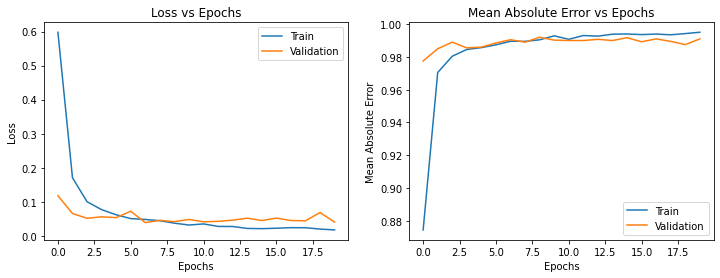

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

## Misture of Batch-normalization, dropout and L2 regulation

### dropout=0.1 , default batch-normalization, penalty rate=0.001

accuracy: 0.983


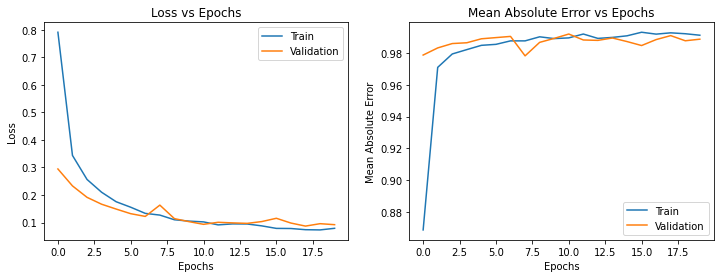

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.2 , default batch-normalization, penalty rate=0.001

accuracy: 0.979


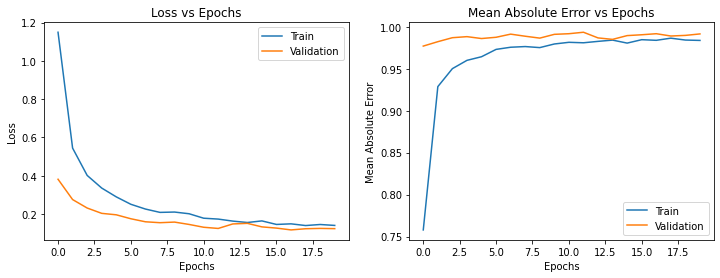

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    BatchNormalization(),
                    Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(0.001))
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.1 , default batch-normalization, penalty rate=0.01

accuracy: 0.980


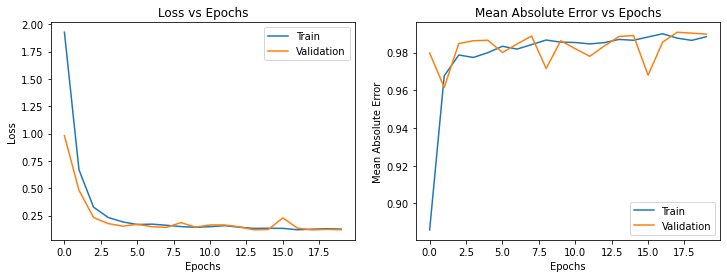

In [38]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.2 , batch-normalization momentum=0.5, penalty rate=0.001

accuracy: 0.988


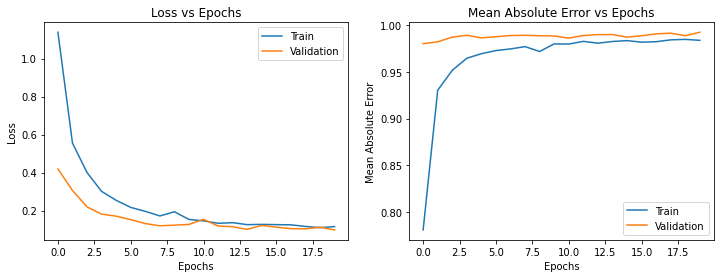

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    BatchNormalization(momentum=0.5),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
                    Dropout(0.2),
                    BatchNormalization(momentum=0.5),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
                    Dropout(0.2),
                    BatchNormalization(momentum=0.5),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

### dropout=0.2 , batch-normalization center=False, penalty rate=0.001

accuracy: 0.977


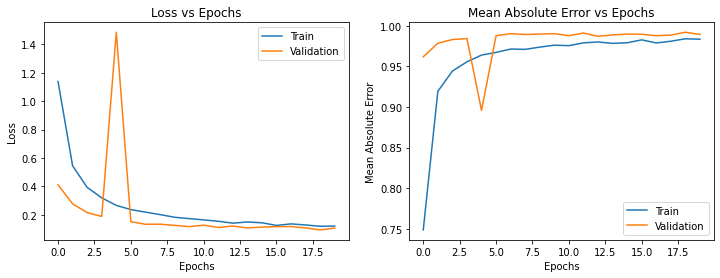

In [ ]:
model_best = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    BatchNormalization(center=False),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    BatchNormalization(center=False),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    Dropout(0.2),
                    BatchNormalization(center=False),
                    Dense(10, activation='softmax')
])

model_best.compile(
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history =model_best.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.2, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)

# Final Model

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 20, 20, 16)        6416      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_108 (Dense)            (None, 64)                102464    
_________________________________________________________________
dropout_63 (Dropout)         (None, 64)              

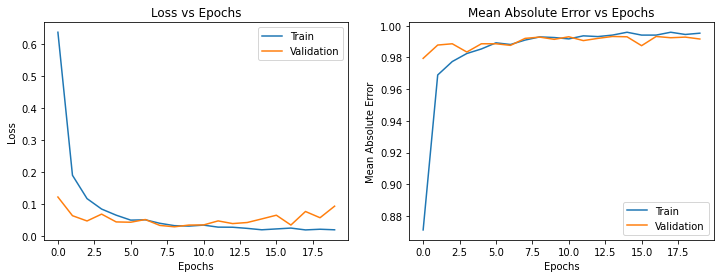

In [41]:
model_final = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation = 'relu', input_shape=(28,28,1)), 
                    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
                    Conv2D(filters=16, kernel_size=(5,5), activation = 'relu'), 
                    MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
                    Flatten(),
                    Dense(64, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(32, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(16, activation = 'relu', kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
])

model_final.summary()

model_final.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy', 
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()] 
)

history=model_final.fit(x_train[..., np.newaxis], y_train, epochs=20, batch_size = 64, 
                   validation_split=0.25, verbose = False)

plot(history)
get_test_accuracy(model_best, x_test, y_test)